### ESMA 4016
### Random Forest con las libreria H20  y scikit-learn
#### Edgar Acuna

In [1]:
import h2o
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import graphviz
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()
h2o.no_progress()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 hour 59 mins
H2O cluster timezone:,America/La_Paz
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.6
H2O cluster version age:,25 days
H2O cluster name:,H2O_from_python_edgar2017_9rszyt
H2O cluster total nodes:,1
H2O cluster free memory:,1.578 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


### I- Aplicando Random Forest a Diabetes usando H20. 

In [2]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy="C9"
# Create test/train split
#train, test = vehicle.split_frame(ratios=[0.75], seed=1)
model=H2ORandomForestEstimator(ntrees=50,nfolds=10,max_depth=10)
model.train(myx, myy, training_frame = diabetes)
y_pred=model.predict(diabetes)
print (y_pred['predict']==diabetes['C9']).sum()/float(len(diabetes))

0.94921875


In [3]:
model.model_performance(diabetes)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.0418014868998
RMSE: 0.204454119303
LogLoss: 0.185780367692
Mean Per-Class Error: 0.00973134328358
AUC: 0.999399253731
Gini: 0.998798507463
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.421681493521: 


,1,2,Error,Rate
1,494.0,6.0,0.012,(6.0/500.0)
2,2.0,266.0,0.0075,(2.0/268.0)
Total,496.0,272.0,0.0104,(8.0/768.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4216815,0.9851852,183.0
max f2,0.4216815,0.9895833,183.0
max f0point5,0.4790862,0.9916413,173.0
max accuracy,0.4790862,0.9895833,173.0
max precision,0.9842231,1.0,0.0
max recall,0.3328830,1.0,202.0
max specificity,0.9842231,1.0,0.0
max absolute_mcc,0.4216815,0.9772175,183.0
max min_per_class_accuracy,0.4279633,0.9888060,181.0
max mean_per_class_accuracy,0.4216815,0.9902687,183.0


Gains/Lift Table: Avg response rate: 34.90 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104167,0.9465067,2.8656716,2.8656716,1.0,1.0,0.0298507,0.0298507,186.5671642,186.5671642
,2,0.0208333,0.9372074,2.8656716,2.8656716,1.0,1.0,0.0298507,0.0597015,186.5671642,186.5671642
,3,0.03125,0.9223724,2.8656716,2.8656716,1.0,1.0,0.0298507,0.0895522,186.5671642,186.5671642
,4,0.0403646,0.9126778,2.8656716,2.8656716,1.0,1.0,0.0261194,0.1156716,186.5671642,186.5671642
,5,0.0507812,0.9058826,2.8656716,2.8656716,1.0,1.0,0.0298507,0.1455224,186.5671642,186.5671642
,6,0.1015625,0.8680000,2.8656716,2.8656716,1.0,1.0,0.1455224,0.2910448,186.5671642,186.5671642
,7,0.1510417,0.8222099,2.8656716,2.8656716,1.0,1.0,0.1417910,0.4328358,186.5671642,186.5671642
,8,0.2005208,0.7633750,2.8656716,2.8656716,1.0,1.0,0.1417910,0.5746269,186.5671642,186.5671642
,9,0.3007812,0.6289544,2.8656716,2.8656716,1.0,1.0,0.2873134,0.8619403,186.5671642,186.5671642
,10,0.3997396,0.3093613,1.3951296,2.5016287,0.4868421,0.8729642,0.1380597,1.0,39.5129615,150.1628664


In [19]:
#Mostrando la matrix de consusion para estimar la precision out-of-bag y por validacion crizada
model.confusion_matrix

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1525969846733_1104


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.0954106658468
RMSE: 0.308886169724
LogLoss: 0.317328124574
Mean Per-Class Error: 0.171884777922
AUC: 0.915245087539
Gini: 0.830490175078
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.392428731884: 


,<=50K,>50K,Error,Rate
<=50K,22074.0,2646.0,0.107,(2646.0/24720.0)
>50K,2085.0,5756.0,0.2659,(2085.0/7841.0)
Total,24159.0,8402.0,0.1453,(4731.0/32561.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3924287,0.7087361,206.0
max f2,0.1554026,0.7903656,308.0
max f0point5,0.6246580,0.7462044,125.0
max accuracy,0.5208434,0.8648076,158.0
max precision,0.9962364,0.9979381,2.0
max recall,0.0000153,1.0,399.0
max specificity,0.9999238,0.9999595,0.0
max absolute_mcc,0.4500456,0.6173835,184.0
max min_per_class_accuracy,0.2935780,0.8268078,248.0
max mean_per_class_accuracy,0.2857187,0.8281152,251.0


Gains/Lift Table: Avg response rate: 24.08 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100120,0.9992745,4.1526591,4.1526591,1.0,1.0,0.0415763,0.0415763,315.2659100,315.2659100
,2,0.0200240,0.9875952,4.1144444,4.1335518,0.9907975,0.9953988,0.0411937,0.0827701,311.4444445,313.3551772
,3,0.0300666,0.9677419,4.1526591,4.1399339,1.0,0.9969356,0.0417039,0.1244739,315.2659100,313.9933893
,4,0.0400172,0.9414885,4.0757580,4.1239761,0.9814815,0.9930929,0.0405561,0.1650300,307.5758005,312.3976113
,5,0.0500292,0.9102564,3.8978947,4.0787321,0.9386503,0.9821977,0.0390256,0.2040556,289.7894738,307.8732081
,6,0.1000276,0.7680600,3.5022119,3.7905605,0.8433661,0.9128032,0.1751052,0.3791608,250.2211882,279.0560486
,7,0.1500261,0.6315827,2.8135031,3.4649413,0.6775184,0.8343910,0.1406708,0.5198317,181.3503063,246.4941349
,8,0.2000246,0.5043899,2.2803914,3.1688493,0.5491400,0.7630892,0.1140161,0.6338477,128.0391422,216.8849336
,9,0.3000215,0.3308555,1.5904072,2.6427558,0.3829853,0.6364009,0.1590358,0.7928836,59.0407217,164.2755822
,10,0.4000184,0.2008930,1.0024539,2.2327118,0.2414005,0.5376583,0.1002423,0.8931259,0.2453947,123.2711837




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.0944866573284
RMSE: 0.307386820356
LogLoss: 0.307497343154
Mean Per-Class Error: 0.168600482011
AUC: 0.91708573596
Gini: 0.83417147192
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.336857105791: 


,<=50K,>50K,Error,Rate
<=50K,21315.0,3405.0,0.1377,(3405.0/24720.0)
>50K,1608.0,6233.0,0.2051,(1608.0/7841.0)
Total,22923.0,9638.0,0.154,(5013.0/32561.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3368571,0.7131987,229.0
max f2,0.1477156,0.7948373,310.0
max f0point5,0.6608986,0.7479615,114.0
max accuracy,0.5142757,0.8655447,160.0
max precision,0.9996131,1.0,0.0
max recall,0.0000351,1.0,399.0
max specificity,0.9996131,1.0,0.0
max absolute_mcc,0.4199436,0.6202203,195.0
max min_per_class_accuracy,0.2911720,0.8298544,248.0
max mean_per_class_accuracy,0.3100314,0.8313995,240.0


Gains/Lift Table: Avg response rate: 24.08 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100120,0.9939895,4.1526591,4.1526591,1.0,1.0,0.0415763,0.0415763,315.2659100,315.2659100
,2,0.0200240,0.9830000,4.1399209,4.1462900,0.9969325,0.9984663,0.0414488,0.0830251,313.9920882,314.6289991
,3,0.0300974,0.965,4.1273380,4.1399469,0.9939024,0.9969388,0.0415763,0.1246015,312.7338008,313.9946878
,4,0.0400172,0.9399286,4.1012330,4.1303501,0.9876161,0.9946278,0.0406836,0.1652850,310.1232981,313.0350110
,5,0.0500292,0.91,3.9361094,4.0914781,0.9478528,0.9852670,0.0394082,0.2046933,293.6109392,309.1478118
,6,0.1000276,0.7624119,3.4690518,3.7803605,0.8353808,0.9103469,0.1734473,0.3781405,246.9051828,278.0360525
,7,0.1500261,0.6281945,2.8772724,3.4793928,0.6928747,0.8378710,0.1438592,0.5219997,187.7272398,247.9392773
,8,0.2000246,0.5023187,2.2625360,3.1752253,0.5448403,0.7646246,0.1131233,0.6351231,126.2536008,217.5225290
,9,0.3000215,0.3300000,1.6426981,2.6644352,0.3955774,0.6416215,0.1642648,0.7993878,64.2698071,166.4435176
,10,0.4000184,0.2011260,0.9514385,2.2362189,0.2291155,0.5385029,0.0951409,0.8945288,-4.8561521,123.6218881



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
accuracy,0.8557172,0.0056866,0.8488665,0.8566108,0.8481207,0.8482972,0.8681931,0.8600724,0.8444109,0.8532724,0.8616862,0.8676425
auc,0.9172029,0.0043945,0.906693,0.9177668,0.9113072,0.9183915,0.9313124,0.9200370,0.9165676,0.9124453,0.9172846,0.9202243
err,0.1442827,0.0056866,0.1511335,0.1433892,0.1518792,0.1517028,0.1318069,0.1399276,0.1555891,0.1467276,0.1383138,0.1323575
err_count,469.8,19.156721,480.0,462.0,493.0,490.0,426.0,464.0,515.0,482.0,461.0,425.0
f0point5,0.6944455,0.0116775,0.6724684,0.6969402,0.6753277,0.6890536,0.6974323,0.6997299,0.6737811,0.7000238,0.7252263,0.7144716
f1,0.7172135,0.0074082,0.7125748,0.7130435,0.7006679,0.7206385,0.7389706,0.7107232,0.7143649,0.7096385,0.7305669,0.7209455
f2,0.7421954,0.0144221,0.7577687,0.7299085,0.7279838,0.7552581,0.7857701,0.7220674,0.7601511,0.7195211,0.7359868,0.7275377
lift_top_group,4.157928,0.0945320,4.2234044,4.162791,4.2046633,3.9876542,4.397279,4.2458386,4.081381,4.0505548,3.9443786,4.2813334
logloss,0.3075063,0.0129593,0.3455034,0.2983691,0.3146811,0.3021318,0.2789586,0.2910806,0.3203061,0.3101744,0.3226586,0.2911997
max_per_class_error,0.2397286,0.0222916,0.2087766,0.2583979,0.2525907,0.2197531,0.1795918,0.2701665,0.2059186,0.2737361,0.2603550,0.268


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2018-05-10 14:34:46,53.156 sec,0.0,nan,nan,nan,nan,nan
,2018-05-10 14:34:46,53.201 sec,1.0,0.3796713,3.4188301,0.8155289,2.8350811,0.1873739
,2018-05-10 14:34:46,53.242 sec,2.0,0.3764685,3.0939931,0.8164008,2.9296968,0.1881883
,2018-05-10 14:34:46,53.283 sec,3.0,0.3667262,2.5705995,0.8335322,3.0308145,0.1816686
,2018-05-10 14:34:46,53.328 sec,4.0,0.3591954,2.1754763,0.8448378,3.1497184,0.1785335
---,---,---,---,---,---,---,---,---
,2018-05-10 14:34:49,56.925 sec,66.0,0.3105401,0.3348466,0.9131652,4.1441670,0.1490126
,2018-05-10 14:34:49,56.988 sec,67.0,0.3105157,0.3348186,0.9131317,4.1440436,0.1485519
,2018-05-10 14:34:50,57.051 sec,68.0,0.3104649,0.3347822,0.9131897,4.1438982,0.1475999
,2018-05-10 14:34:50,57.107 sec,69.0,0.3103963,0.3337514,0.9132453,4.1526591,0.1409969



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
C8,52661.3164062,1.0,0.1695343
C11,42302.8593750,0.8033005,0.1361869
C6,36100.9257812,0.6855303,0.1162209
C1,28606.3183594,0.5432131,0.0920932
C7,27755.6152344,0.5270589,0.0893545
C5,25600.5605469,0.4861360,0.0824167
C4,23276.8378906,0.4420102,0.0749359
C13,18809.4824219,0.3571784,0.0605540
C3,17458.1601562,0.3315177,0.0562036
C12,11310.0722656,0.2147700,0.0364109


<bound method ?.confusion_matrix of >

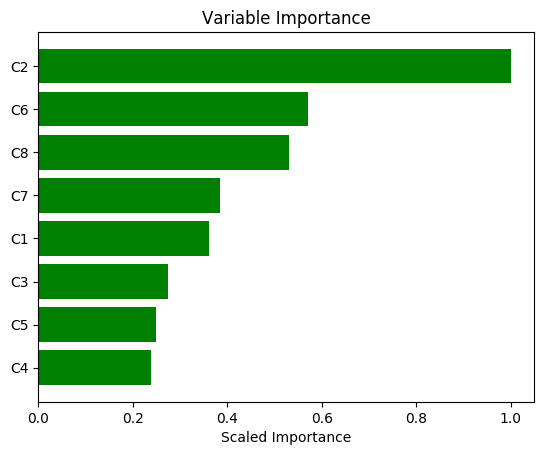

In [5]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance =model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

#### Segun random Forest las variables mas importantes serian plas, age y mass

### II Random Forest  para Diabetes usando scikit learn

In [6]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
#La variable de respuesta y debe ser binaria (0,1)
y=data['class']-1
X=data.iloc[:,0:8]
clf = RandomForestClassifier(n_estimators=50,max_depth=10, oob_score=True,random_state=0)
clf.fit(X, y)
print "la Precision estimada es", clf.score(X,y)

la Precision estimada es 0.986979166667


In [8]:
# Tasa de precision
predictions = clf.predict(X)
print(classification_report(y, predictions))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       500
          1       1.00      0.97      0.98       268

avg / total       0.99      0.99      0.99       768



In [9]:
print(confusion_matrix(y,predictions))

[[499   1]
 [  9 259]]


In [10]:
#Tasa de precision usando out-of-Bag
print clf.oob_score_

0.7421875


In [11]:
print(clf.feature_importances_)

[ 0.08178093  0.25522871  0.08433383  0.07064764  0.06914087  0.17326173
  0.12167218  0.14393411]


#### Nuevamente las variables mas importantes salieron plas mass y age

### III. Random Forest para Landsat usando H2o

In [12]:
#Leyendo los datos
datos= h2o.import_file("http://academic.uprm.edu/eacuna/landsat.txt")
myx=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13',
            'C14','C15','C16','C17','C18','C19','C20','C21','C22','C23','C24','C25','C26','C27',
           'C28','C29', 'C30','C31','C32','C33','C34','C35','C36']
datos['C37']=datos['C37'].asfactor()
myy="C37"
model=H2ORandomForestEstimator(ntrees=50,max_depth=10,nfolds=10)
model.train(myx, myy, training_frame = datos)
y_pred=model.predict(datos)
print (y_pred['predict']==datos['C37']).sum()/float(len(datos))
model.model_performance(datos)

0.984216459977

ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.025741118164
RMSE: 0.160440388194
LogLoss: 0.112026858001
Mean Per-Class Error: 0.0253718538326
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,5,6,Error,Rate
1072.0,0.0,0.0,0.0,0.0,0.0,0.0,"0 / 1,072"
1.0,477.0,0.0,0.0,1.0,0.0,0.0041754,2 / 479
0.0,0.0,961.0,0.0,0.0,0.0,0.0,0 / 961
0.0,0.0,33.0,370.0,0.0,12.0,0.1084337,45 / 415
9.0,0.0,0.0,0.0,455.0,6.0,0.0319149,15 / 470
0.0,0.0,2.0,6.0,0.0,1030.0,0.0077071,"8 / 1,038"
1082.0,477.0,996.0,376.0,456.0,1048.0,0.0157835,"70 / 4,435"


Top-6 Hit Ratios: 


k,hit_ratio
1,0.9842165
2,0.9997745
3,0.9997745
4,1.0
5,1.0
6,1.0


In [22]:
#Mostrando la matrix de consusion para estimar la precision out-of-bag y por validacion crizada
print model.confusion_matrix

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1525969846733_1104


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.0954106658468
RMSE: 0.308886169724
LogLoss: 0.317328124574
Mean Per-Class Error: 0.171884777922
AUC: 0.915245087539
Gini: 0.830490175078
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.392428731884: 


,<=50K,>50K,Error,Rate
<=50K,22074.0,2646.0,0.107,(2646.0/24720.0)
>50K,2085.0,5756.0,0.2659,(2085.0/7841.0)
Total,24159.0,8402.0,0.1453,(4731.0/32561.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3924287,0.7087361,206.0
max f2,0.1554026,0.7903656,308.0
max f0point5,0.6246580,0.7462044,125.0
max accuracy,0.5208434,0.8648076,158.0
max precision,0.9962364,0.9979381,2.0
max recall,0.0000153,1.0,399.0
max specificity,0.9999238,0.9999595,0.0
max absolute_mcc,0.4500456,0.6173835,184.0
max min_per_class_accuracy,0.2935780,0.8268078,248.0
max mean_per_class_accuracy,0.2857187,0.8281152,251.0


Gains/Lift Table: Avg response rate: 24.08 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100120,0.9992745,4.1526591,4.1526591,1.0,1.0,0.0415763,0.0415763,315.2659100,315.2659100
,2,0.0200240,0.9875952,4.1144444,4.1335518,0.9907975,0.9953988,0.0411937,0.0827701,311.4444445,313.3551772
,3,0.0300666,0.9677419,4.1526591,4.1399339,1.0,0.9969356,0.0417039,0.1244739,315.2659100,313.9933893
,4,0.0400172,0.9414885,4.0757580,4.1239761,0.9814815,0.9930929,0.0405561,0.1650300,307.5758005,312.3976113
,5,0.0500292,0.9102564,3.8978947,4.0787321,0.9386503,0.9821977,0.0390256,0.2040556,289.7894738,307.8732081
,6,0.1000276,0.7680600,3.5022119,3.7905605,0.8433661,0.9128032,0.1751052,0.3791608,250.2211882,279.0560486
,7,0.1500261,0.6315827,2.8135031,3.4649413,0.6775184,0.8343910,0.1406708,0.5198317,181.3503063,246.4941349
,8,0.2000246,0.5043899,2.2803914,3.1688493,0.5491400,0.7630892,0.1140161,0.6338477,128.0391422,216.8849336
,9,0.3000215,0.3308555,1.5904072,2.6427558,0.3829853,0.6364009,0.1590358,0.7928836,59.0407217,164.2755822
,10,0.4000184,0.2008930,1.0024539,2.2327118,0.2414005,0.5376583,0.1002423,0.8931259,0.2453947,123.2711837




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.0944866573284
RMSE: 0.307386820356
LogLoss: 0.307497343154
Mean Per-Class Error: 0.168600482011
AUC: 0.91708573596
Gini: 0.83417147192
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.336857105791: 


,<=50K,>50K,Error,Rate
<=50K,21315.0,3405.0,0.1377,(3405.0/24720.0)
>50K,1608.0,6233.0,0.2051,(1608.0/7841.0)
Total,22923.0,9638.0,0.154,(5013.0/32561.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3368571,0.7131987,229.0
max f2,0.1477156,0.7948373,310.0
max f0point5,0.6608986,0.7479615,114.0
max accuracy,0.5142757,0.8655447,160.0
max precision,0.9996131,1.0,0.0
max recall,0.0000351,1.0,399.0
max specificity,0.9996131,1.0,0.0
max absolute_mcc,0.4199436,0.6202203,195.0
max min_per_class_accuracy,0.2911720,0.8298544,248.0
max mean_per_class_accuracy,0.3100314,0.8313995,240.0


Gains/Lift Table: Avg response rate: 24.08 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100120,0.9939895,4.1526591,4.1526591,1.0,1.0,0.0415763,0.0415763,315.2659100,315.2659100
,2,0.0200240,0.9830000,4.1399209,4.1462900,0.9969325,0.9984663,0.0414488,0.0830251,313.9920882,314.6289991
,3,0.0300974,0.965,4.1273380,4.1399469,0.9939024,0.9969388,0.0415763,0.1246015,312.7338008,313.9946878
,4,0.0400172,0.9399286,4.1012330,4.1303501,0.9876161,0.9946278,0.0406836,0.1652850,310.1232981,313.0350110
,5,0.0500292,0.91,3.9361094,4.0914781,0.9478528,0.9852670,0.0394082,0.2046933,293.6109392,309.1478118
,6,0.1000276,0.7624119,3.4690518,3.7803605,0.8353808,0.9103469,0.1734473,0.3781405,246.9051828,278.0360525
,7,0.1500261,0.6281945,2.8772724,3.4793928,0.6928747,0.8378710,0.1438592,0.5219997,187.7272398,247.9392773
,8,0.2000246,0.5023187,2.2625360,3.1752253,0.5448403,0.7646246,0.1131233,0.6351231,126.2536008,217.5225290
,9,0.3000215,0.3300000,1.6426981,2.6644352,0.3955774,0.6416215,0.1642648,0.7993878,64.2698071,166.4435176
,10,0.4000184,0.2011260,0.9514385,2.2362189,0.2291155,0.5385029,0.0951409,0.8945288,-4.8561521,123.6218881



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
accuracy,0.8557172,0.0056866,0.8488665,0.8566108,0.8481207,0.8482972,0.8681931,0.8600724,0.8444109,0.8532724,0.8616862,0.8676425
auc,0.9172029,0.0043945,0.906693,0.9177668,0.9113072,0.9183915,0.9313124,0.9200370,0.9165676,0.9124453,0.9172846,0.9202243
err,0.1442827,0.0056866,0.1511335,0.1433892,0.1518792,0.1517028,0.1318069,0.1399276,0.1555891,0.1467276,0.1383138,0.1323575
err_count,469.8,19.156721,480.0,462.0,493.0,490.0,426.0,464.0,515.0,482.0,461.0,425.0
f0point5,0.6944455,0.0116775,0.6724684,0.6969402,0.6753277,0.6890536,0.6974323,0.6997299,0.6737811,0.7000238,0.7252263,0.7144716
f1,0.7172135,0.0074082,0.7125748,0.7130435,0.7006679,0.7206385,0.7389706,0.7107232,0.7143649,0.7096385,0.7305669,0.7209455
f2,0.7421954,0.0144221,0.7577687,0.7299085,0.7279838,0.7552581,0.7857701,0.7220674,0.7601511,0.7195211,0.7359868,0.7275377
lift_top_group,4.157928,0.0945320,4.2234044,4.162791,4.2046633,3.9876542,4.397279,4.2458386,4.081381,4.0505548,3.9443786,4.2813334
logloss,0.3075063,0.0129593,0.3455034,0.2983691,0.3146811,0.3021318,0.2789586,0.2910806,0.3203061,0.3101744,0.3226586,0.2911997
max_per_class_error,0.2397286,0.0222916,0.2087766,0.2583979,0.2525907,0.2197531,0.1795918,0.2701665,0.2059186,0.2737361,0.2603550,0.268


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2018-05-10 14:34:46,53.156 sec,0.0,nan,nan,nan,nan,nan
,2018-05-10 14:34:46,53.201 sec,1.0,0.3796713,3.4188301,0.8155289,2.8350811,0.1873739
,2018-05-10 14:34:46,53.242 sec,2.0,0.3764685,3.0939931,0.8164008,2.9296968,0.1881883
,2018-05-10 14:34:46,53.283 sec,3.0,0.3667262,2.5705995,0.8335322,3.0308145,0.1816686
,2018-05-10 14:34:46,53.328 sec,4.0,0.3591954,2.1754763,0.8448378,3.1497184,0.1785335
---,---,---,---,---,---,---,---,---
,2018-05-10 14:34:49,56.925 sec,66.0,0.3105401,0.3348466,0.9131652,4.1441670,0.1490126
,2018-05-10 14:34:49,56.988 sec,67.0,0.3105157,0.3348186,0.9131317,4.1440436,0.1485519
,2018-05-10 14:34:50,57.051 sec,68.0,0.3104649,0.3347822,0.9131897,4.1438982,0.1475999
,2018-05-10 14:34:50,57.107 sec,69.0,0.3103963,0.3337514,0.9132453,4.1526591,0.1409969



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
C8,52661.3164062,1.0,0.1695343
C11,42302.8593750,0.8033005,0.1361869
C6,36100.9257812,0.6855303,0.1162209
C1,28606.3183594,0.5432131,0.0920932
C7,27755.6152344,0.5270589,0.0893545
C5,25600.5605469,0.4861360,0.0824167
C4,23276.8378906,0.4420102,0.0749359
C13,18809.4824219,0.3571784,0.0605540
C3,17458.1601562,0.3315177,0.0562036
C12,11310.0722656,0.2147700,0.0364109


<bound method ?.confusion_matrix of >


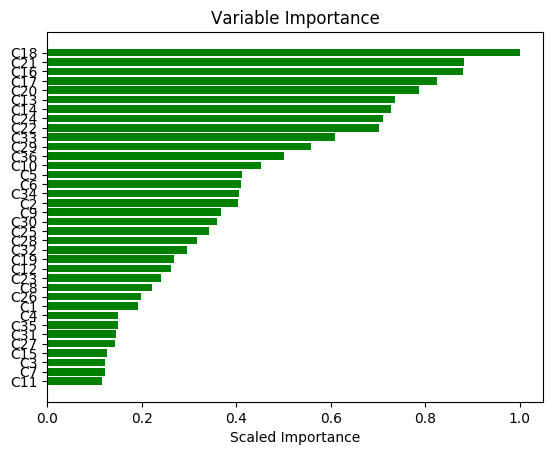

In [14]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance =model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

#### Las 6 variables mas importantes c18, c17, c22, c21, c24 y c20

### IV. Random Forest para Landsat usando Scikit-Learn

In [20]:
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]-1
names=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13',
            'C14','C15','C16','C17','C18','C19','C20','C21','C22','C23','C24','C25','C26','C27',
           'C28','C29', 'C30','C31','C32','C33','C34','C35','C36','C37']
X=data.iloc[:,0:36]
clf = RandomForestClassifier(n_estimators=50,max_depth=10, oob_score=True, random_state=0)
clf.fit(X, y)
print "la Precision estimada es", clf.score(X,y)

la Precision estimada es 0.972717023675


In [21]:
predictions = clf.predict(X)
print(classification_report(y, predictions))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99      1072
          1       1.00      1.00      1.00       479
          2       0.95      1.00      0.97       961
          3       0.98      0.80      0.88       415
          4       1.00      0.93      0.97       470
          5       0.96      0.99      0.98      1038

avg / total       0.97      0.97      0.97      4435



In [52]:
#Estimacion del error usando out-of-bag
print clf.oob_score_

0.898534385569


In [53]:
print(clf.feature_importances_)

[ 0.0151426   0.02236955  0.00933652  0.01346124  0.03756244  0.02431621
  0.00885772  0.01182643  0.02164484  0.01734902  0.00778902  0.02265685
  0.03495008  0.04105357  0.02258549  0.03426316  0.08886045  0.05336134
  0.02783217  0.04746638  0.04815995  0.04380354  0.01428742  0.02988966
  0.04441645  0.02346674  0.00710566  0.02775813  0.02947498  0.02382096
  0.00788551  0.03829542  0.03270221  0.03890708  0.00804944  0.01929177]


#### Las variables mas importante son 17, 18, 21, 20, 25 y 22

### V. Aplicando Random Forest   a un dataset con missing values 

In [17]:
#Leyendo los datos
datos= h2o.import_file("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",na_strings=[' ?'])
myx=['C1', 'C2', 'C3', 'C4', 'C5','C6','C7','C8','C9','C10','C11', 'C12','C13','C14']
datos['C15']=datos['C15'].asfactor()
myy="C15"
model=H2ORandomForestEstimator(ntrees=100,max_depth=20,nfolds=10)
model.train(myx, myy, training_frame = datos)
y_pred=model.predict(datos)
print (y_pred['predict']==datos['C15']).sum()/float(len(datos))
model.model_performance(datos)

0.944074199195

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.0482756745585
RMSE: 0.219717260493
LogLoss: 0.168984138878
Mean Per-Class Error: 0.0581370035895
AUC: 0.986552904841
Gini: 0.973105809683
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.406550936827: 


,<=50K,>50K,Error,Rate
<=50K,23638.0,1082.0,0.0438,(1082.0/24720.0)
>50K,711.0,7130.0,0.0907,(711.0/7841.0)
Total,24349.0,8212.0,0.0551,(1793.0/32561.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4065509,0.8883075,203.0
max f2,0.3057791,0.9245361,240.0
max f0point5,0.5479297,0.9002645,158.0
max accuracy,0.4099955,0.9450570,202.0
max precision,0.9997935,1.0,0.0
max recall,0.1272799,1.0,313.0
max specificity,0.9997935,1.0,0.0
max absolute_mcc,0.4065509,0.8521938,203.0
max min_per_class_accuracy,0.3619990,0.9398463,219.0
max mean_per_class_accuracy,0.3342153,0.9418630,229.0


Gains/Lift Table: Avg response rate: 24.08 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100120,0.9971092,4.1526591,4.1526591,1.0,1.0,0.0415763,0.0415763,315.2659100,315.2659100
,2,0.0200240,0.9906771,4.1526591,4.1526591,1.0,1.0,0.0415763,0.0831527,315.2659100,315.2659100
,3,0.0300052,0.9830752,4.1526591,4.1526591,1.0,1.0,0.0414488,0.1246015,315.2659100,315.2659100
,4,0.0400172,0.9710523,4.1526591,4.1526591,1.0,1.0,0.0415763,0.1661778,315.2659100,315.2659100
,5,0.0500292,0.9518182,4.1526591,4.1526591,1.0,1.0,0.0415763,0.2077541,315.2659100,315.2659100
,6,0.1000276,0.8125151,4.1271514,4.1399091,0.9938575,0.9969297,0.2063512,0.4141053,312.7151366,313.9909148
,7,0.1500261,0.6947983,3.8873787,4.0557496,0.9361179,0.9766633,0.1943630,0.6084683,288.7378666,305.5749553
,8,0.2000246,0.5585388,3.3797748,3.8867818,0.8138821,0.9359742,0.1689835,0.7774519,237.9774759,288.6781801
,9,0.3000215,0.3068333,1.9156308,3.2297987,0.4613022,0.7777664,0.1915572,0.9690091,91.5630825,222.9798735
,10,0.4000184,0.1515194,0.2984405,2.4970154,0.0718673,0.6013052,0.0298431,0.9988522,-70.1559512,149.7015437


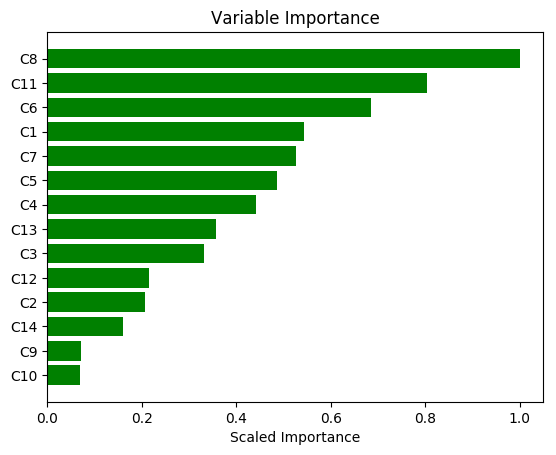

In [18]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()